<a href="https://colab.research.google.com/github/rafisondi/ml-playground/blob/main/MonteCarloMarkovChain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

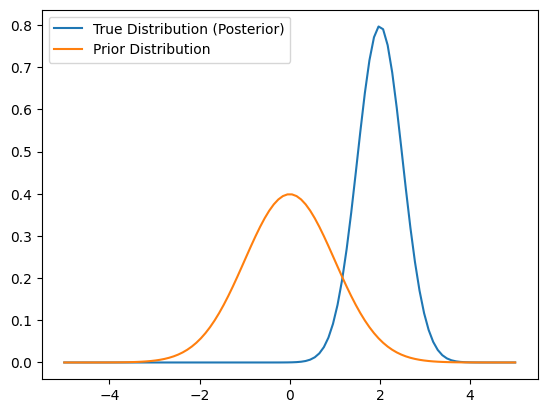

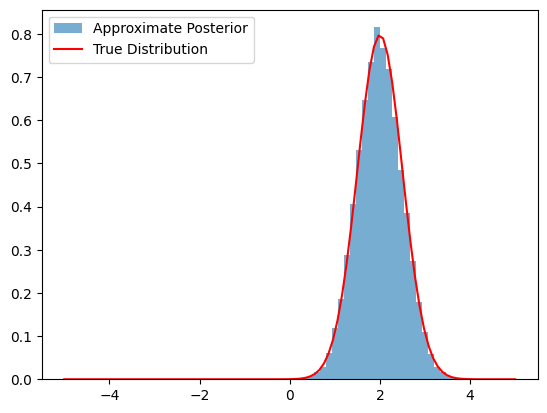

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# True (posterior) distribution
def true_distribution(x, sigma=0.5):
    return 1/(np.sqrt(2*np.pi*sigma**2)) * np.exp(-((x-2)**2) / (2*sigma**2))

# Prior distribution (for reference, though it's not directly used in the algorithm)
def prior_distribution(x):
    return 1/(np.sqrt(2*np.pi)) * np.exp(-(x**2) / 2)

# Plot true distribution and prior
x = np.linspace(-5, 5, 100)
y = true_distribution(x)
z = prior_distribution(x)
plt.plot(x, y, label="True Distribution (Posterior)")
plt.plot(x, z, label="Prior Distribution")
plt.legend()
plt.show()

# Metropolis-Hastings implementation
def proposal_distribution(xi, xj):
    return 1/(np.sqrt(2*np.pi)) * np.exp(-((xi - xj)**2) / 2)

def acceptance_criterion(theta_i, theta_next):
    # Use true_distribution in place of prior for posterior evaluation
    numerator = true_distribution(theta_next) * proposal_distribution(theta_i, theta_next)
    denominator = true_distribution(theta_i) * proposal_distribution(theta_next, theta_i)
    return min(1, numerator / denominator)

# Parameters
iter_max = 100_000
theta = np.zeros(iter_max)  # Initialize theta vector to store all samples

# Start Metropolis-Hastings algorithm
for i in range(iter_max - 1):
    # Sample next theta from proposal distribution centered on current theta
    theta_next = np.random.normal(theta[i], 0.1)  # Adjust standard deviation as needed
    u = np.random.uniform(0, 1)
    if u < acceptance_criterion(theta[i], theta_next):
        theta[i + 1] = theta_next
    else:
        theta[i + 1] = theta[i]

# Plot the sampled theta values to visualize the posterior approximation
plt.hist(theta, bins=30, density=True, alpha=0.6, label="Approximate Posterior")
plt.plot(x, y, label="True Distribution", color="red")
plt.legend()
plt.show()


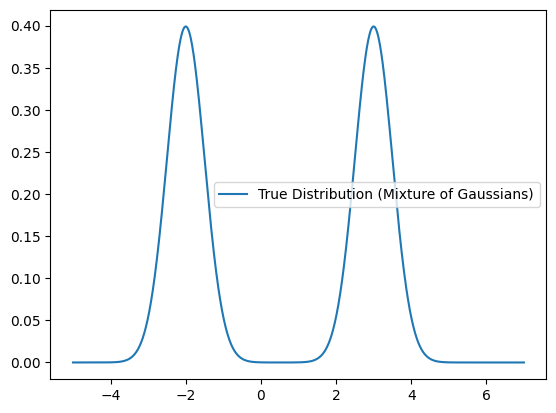

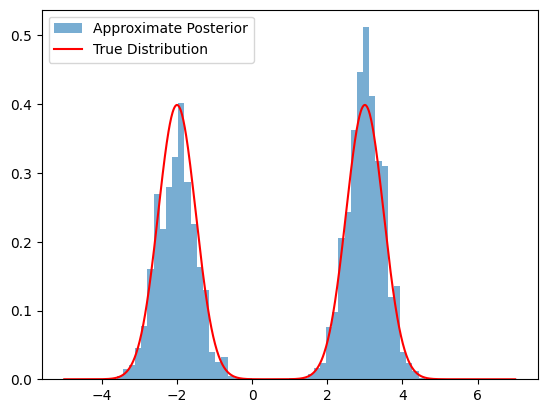

In [4]:

# Define the true (posterior) multimodal distribution
def true_distribution(x):
    # Mixture of two Gaussians centered at -2 and 3 with equal weights
    component1 = 0.5 * (1 / (np.sqrt(2 * np.pi * 0.5**2))) * np.exp(-((x + 2)**2) / (2 * 0.5**2))
    component2 = 0.5 * (1 / (np.sqrt(2 * np.pi * 0.5**2))) * np.exp(-((x - 3)**2) / (2 * 0.5**2))
    return component1 + component2

# Plot the true distribution
x = np.linspace(-5, 7, 1000)
y = true_distribution(x)
plt.plot(x, y, label="True Distribution (Mixture of Gaussians)")
plt.legend()
plt.show()

# Parameters
iter_max = 5000
theta = np.zeros(iter_max)  # Initialize theta vector to store all samples

# Start Metropolis-Hastings algorithm with a larger proposal variance
for i in range(iter_max - 1):
    # Sample next theta with a wider proposal distribution to explore modes
    theta_next = np.random.normal(theta[i], 1.5)  # Larger std dev encourages jumps between modes
    u = np.random.uniform(0, 1)
    if u < acceptance_criterion(theta[i], theta_next):
        theta[i + 1] = theta_next
    else:
        theta[i + 1] = theta[i]

# Plot the sampled theta values to visualize the posterior approximation
plt.hist(theta, bins=50, density=True, alpha=0.6, label="Approximate Posterior")
plt.plot(x, y, label="True Distribution", color="red")
plt.legend()
plt.show()
